<img width="10%" alt="Naas" src="https://landen.imgix.net/jtci2pxwjczr/assets/5ice39g4.png?w=160"/>

# PyPI - Get number of downloads for any package

**Tags:** #pypi #downloads #naas_drivers #package

**Author:** [Sanjeet Attili](https://linkedin.com/in/sanjeet-attili-760bab190/)

This notebook enables you to get a plot of number of downloads of any package since past 180 days

## Input

### Imports

In [1]:
!pip install -U pypistats --user

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.2/84.2 KB 1.0 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.6/106.6 KB 2.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.3/68.3 KB 1.1 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 KB 799.5 kB/s eta 0:00:00a 0:00:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sanic 20.12.2 requires httpx==0.15.4, but you have httpx 0.22.0 which is incompatible.
sanic 20.12.2 requires multidict<6.0,>=5.0, but you have multidict 6.0.2 which is incompatible.
naas-drivers 0.89.2 requires idna==2.9, but you have idna 2.10 which is incompatible.
naas-drivers 0.89.2 requires numpy==1.19.5, but you have numpy 1.22.2 which is incompatible.
naas-drivers 0.89.2 requires python-dateutil==2.8.1, but you have python-dateutil 2.8.2 which is incomp

In [2]:
!pip install --upgrade pypistats

In [34]:
import pypistats
from pprint import pprint
from datetime import datetime
import plotly.graph_objects as go

### Variables

In [35]:
package = "naas-drivers"

## Model

**Difference between with_mirrors and without_mirrors**

The with_mirrors and without_mirrors are not mutually exclusive sets of download counts like the other segmentations provided.
In fact, the without_mirrors downloads are a subset of the downloads in with_mirrors.

i.e If you sum the with (a+b) and without (a) mirrors, you count the without mirrors twice (a+b+a).

In [41]:
df = pypistats.overall(package, total=False, format="pandas")
df.head()

,category,date,percent,downloads
0,with_mirrors,2022-03-05,2.56%,2586
1,with_mirrors,2021-10-17,2.25%,2272
2,with_mirrors,2022-03-09,2.14%,2162
3,with_mirrors,2022-02-22,1.99%,2010
4,with_mirrors,2022-03-06,1.69%,1704


In [55]:
# Gives us the cumulative number of downloads over a period of 180 days

def Get_cumulative_dataframe(df):
    
    data = df.groupby('category').get_group('with_mirrors').sort_values(
        'date').reset_index(drop='index').groupby(
        'date').agg({'downloads':'sum'}).reset_index()
    
    cum_sum = 0
    for idx, num in enumerate(data['downloads']):
        cum_sum+=num
        data.loc[idx, 'cumulative_downloads'] = cum_sum

    data['cumulative_downloads'] = data.cumulative_downloads.astype('int')
    data.drop(columns = 'downloads', inplace=True)
    
    return data

df_downloads = Get_cumulative_dataframe(df)
df_downloads.head()

,date,cumulative_downloads
0,2021-09-27,825
1,2021-09-28,908
2,2021-09-29,2011
3,2021-09-30,2584
4,2021-10-01,3734


## Output

### Plotting a line chart for number of downloads

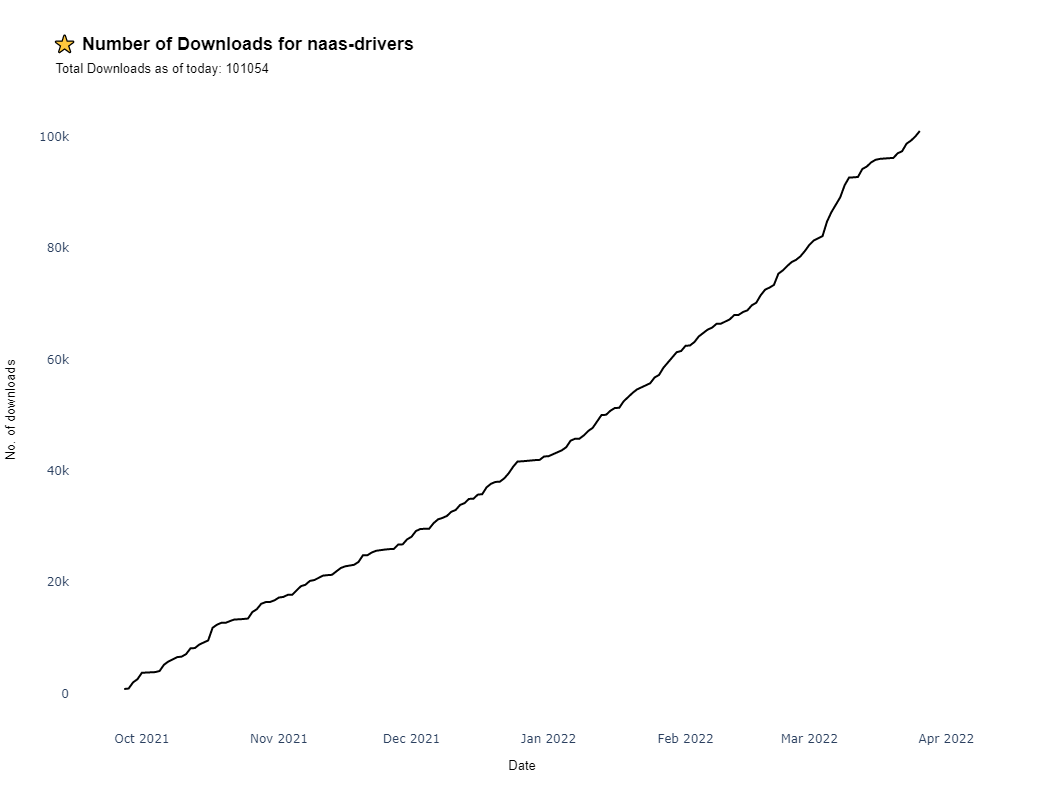

In [56]:
def create_linechart(df, package, date, value):
    
    # Get last value
    last_value = df.loc[df.index[-1], value]
    
    # Init
    fig = go.Figure()
    
    # Create fig
    fig.add_trace(
        go.Scatter(
            x=df[date].to_list(),
            y=df[value].to_list(),
            mode="lines+text",
            line=dict(color="black"),
        )
    )
    fig.update_traces(marker_color='black')
    fig.update_layout(
        title=f"⭐<b> Number of Downloads for {package} </b><br><span style='font-size: 13px;'> Total Downloads as of today: {last_value}</span>",
        title_font=dict(family="Arial", size=18, color="black"),
        plot_bgcolor="#ffffff",
        width=1200,
        height=800,
        paper_bgcolor="white",
        xaxis_title="Date",
        xaxis_title_font=dict(family="Arial", size=13, color="black"),
        yaxis_title='No. of downloads',
        yaxis_title_font=dict(family="Arial", size=13, color="black"),
        margin_pad=10,
    )
    fig.show()
    return fig

fig = create_linechart(df_downloads, package, "date", "cumulative_downloads")